# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
import tensorflow.keras as keras

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target

In [4]:
print(X[1:3])
print(y[1:3])

[[ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]]
[3.585 3.521]


In [5]:
housing_data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

# Split train test

In [6]:
X_temp, X_test,y_temp,y_test = train_test_split(
    X,
    y,
    random_state=2024,
    test_size=0.2
)

X_train, X_valid,y_train, y_valid = train_test_split(
    X_temp,
    y_temp,
    random_state=2024,
    test_size=0.2
) 

# Train model

In [7]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5618 (21.95 KB)
Trainable params: 5601 (21.88 KB)
Non-trainable params: 17 (72.00 Byte)
____________________

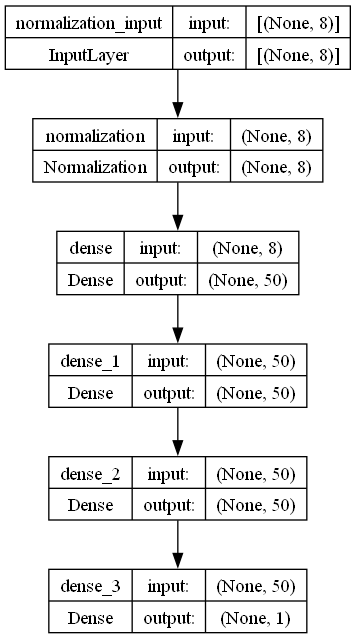

In [9]:
tf.keras.utils.plot_model(model, "housing_price_model_es.png", show_shapes=True)

In [10]:
# calculate mean and std

norm_layer.adapt(X_train)

## Add callback for Checkpointing and Early Stopping

In [13]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("checkpoints/house_price_model", save_weights_only=True)
es_callback = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

## Fit the model

In [14]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks = [checkpoint_callback,es_callback])

Epoch 1/50
  1/413 [..............................] - ETA: 2s - loss: 0.2633 - root_mean_squared_error: 0.5131

413/413 [==============================] - 1s 2ms/step - loss: 0.2409 - root_mean_squared_error: 0.4908 - val_loss: 0.2930 - val_root_mean_squared_error: 0.5413
Epoch 2/50
413/413 [==============================] - 1s 2ms/step - loss: 0.2368 - root_mean_squared_error: 0.4867 - val_loss: 0.2895 - val_root_mean_squared_error: 0.5380
Epoch 3/50
413/413 [==============================] - 1s 2ms/step - loss: 0.2367 - root_mean_squared_error: 0.4865 - val_loss: 0.2923 - val_root_mean_squared_error: 0.5407
Epoch 4/50
413/413 [==============================] - 1s 2ms/step - loss: 0.2385 - root_mean_squared_error: 0.4884 - val_loss: 0.2834 - val_root_mean_squared_error: 0.5324
Epoch 5/50
413/413 [==============================] - 1s 2ms/step - loss: 0.2327 - root_mean_squared_error: 0.4823 - val_loss: 0.2963 - val_root_mean_squared_error: 0.5444
Epoch 6/50
413/413 [==============================] - 1s 2ms/step - loss: 0.2356 - root_mean_squared_error: 0.4854 - val_loss: 0.2957 - val_root_mean_s

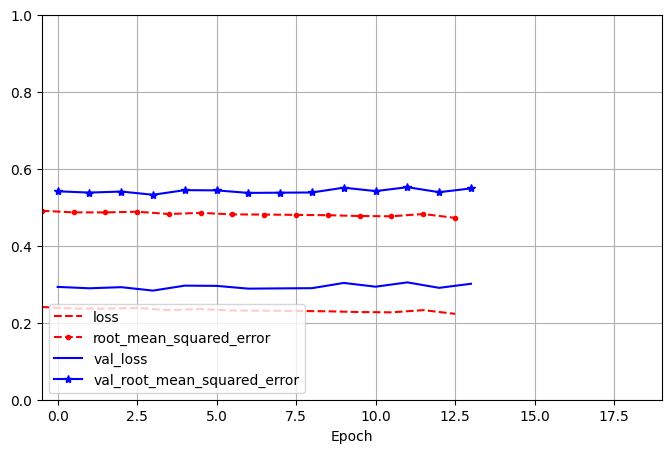

In [15]:
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 19, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()